In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import src.config

# Pfad zu deiner JSONL Datei
DATA_PATH = src.config.PROMPTING_DATA_PATH / "sports_outdoors_prompting-data_non_zero_recall_users.jsonl"

# Laden der Daten (lines=True ist wichtig für JSONL)
df = pd.read_json(DATA_PATH, lines=True)

# Neue Spalte erstellen, die einfach die Länge der Liste in 'history' zählt
df['history_length'] = df['history'].apply(len)

# Ersten 5 Zeilen anzeigen zur Kontrolle
df[['user_id', 'history_length']].head()

,user_id,history_length
0,AE22K4SIBCPAPJIYOJXRNV2SXH7Q,1
1,AE23SPKB6U244ZEX6IH7QIIL2AQA,4
2,AE24DIGJ2EYWSZVQTOXEHJRORJYA,27
3,AE24ZJ6LKEXXPAPX4OCBF5ZQAVJA,2
4,AE26ZBF6R5FQRVBNI44P4B5AVNGA,3


In [4]:
# Durchschnitt berechnen
avg_len = df['history_length'].mean()
print(f"Durchschnittliche History-Länge: {avg_len:.2f} Items")
median_length = df['history_length'].median()
print(f"Median der History-Länge: {median_length} Items")

# Max und Min Werte
max_len = df['history_length'].max()
min_len = df['history_length'].min()

print(f"Längste History: {max_len} Items")
print(f"Kürzeste History: {min_len} Items")

print("-" * 30)

# Den User mit der längsten History finden
max_user = df.loc[df['history_length'].idxmax()]
print(f"User mit der längsten History ({max_len} Items):")
print(f"ID: {max_user['user_id']}")

Durchschnittliche History-Länge: 7.65 Items
Median der History-Länge: 5.0 Items
Längste History: 100 Items
Kürzeste History: 1 Items
------------------------------
User mit der längsten History (100 Items):
ID: AE7WRFKXAKYVJREL3FNYGYL7RJAQ


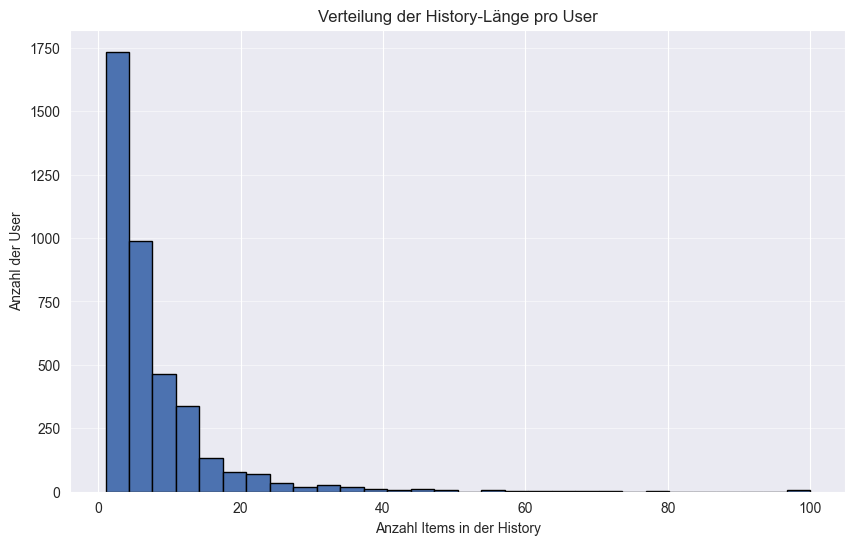

In [3]:
plt.figure(figsize=(10, 6))

# Histogramm plotten
df['history_length'].plot(kind='hist', bins=30, color='#4c72b0', edgecolor='black')

plt.title('Verteilung der History-Länge pro User')
plt.xlabel('Anzahl Items in der History')
plt.ylabel('Anzahl der User')
plt.grid(axis='y', alpha=0.5)

plt.show()